## Overview: Payroll Based Daily Nurse and Non_Nurse Staffinig In US Nursing Homes
- Payroll Based Journal (PBJ) Daily Nurse and Non_Nurse Staffinig are data about nursing home staffing based on data submitted by nursing homes to CMS through the Payroll Based Journal (PBJ) system and daily resident census information based on Minimum Data Set (MDS) records. The data are open to pubic and can be found on this website: https://data.cms.gov/browse?q=PBJ&sortBy=newest.    
- The staffing data are aggregated to the facility-day. All included facilities have one record for each day in the quarter. This results in 90-92 records records per facility for each quarter. The total number of records in the file will be equal to the number of included facilities multiplied by the number of calendar days in the quarter.

### Data: 2020 Q4 PBJ Daily Nurse Staffing






In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from utils import check_null_values, staff_hours_per_person

In [54]:
q4_holidays = ['2020-11-23','2020-11-24','2020-11-25','2020-11-26', '2020-11-27', '2020-12-21',
            '2020-12-22', '2020-12-23','2020-12-24', '2020-12-25', '2020-12-31']

# There are totally 128 unique provider numbers from Ensign
provider_df = pd.read_csv('Our_Provider_numbers.csv')
provider_df.head()

prov_nums = provider_df['our_provnum']
ensign_prov_nums = prov_nums.squeeze().squeeze().tolist()

In [253]:
def add_features(origin_df, holidays, prov_nums):
    df = origin_df.copy()
    df = df[df['MDScensus'] > 0]
    df['WorkDate'] = pd.to_datetime(df.WorkDate, format="%Y%m%d")
    df['year'] = df['WorkDate'].dt.year
    df['month'] = df['WorkDate'].dt.month
    df['day'] = df['WorkDate'].dt.day
    df['day_name'] = df['WorkDate'].dt.day_name()
    df['is_weekend'] = (df['WorkDate'].dt.dayofweek // 5 == 1).astype(bool)
    df['is_holiday_week'] = df['WorkDate'].dt.date.astype('datetime64').isin(holidays)
    df['IsEnsign'] = df['PROVNUM'].isin(prov_nums)
    df['total_hours'] = df['Hrs_RNDON'] + df['Hrs_RNadmin'] + df['Hrs_RN'] + df['Hrs_LPNadmin'] + df['Hrs_LPN'] + df['Hrs_CNA'] + df['Hrs_NAtrn'] + df['Hrs_MedAide']
    df['total_admin_hours'] = df['Hrs_RNDON'] + df['Hrs_RNadmin'] + df['Hrs_LPNadmin']
    df['total_non_admin'] = df['Hrs_RN'] + df['Hrs_LPN'] + df['Hrs_CNA'] + df['Hrs_NAtrn'] + df['Hrs_MedAide']
    df['total_ctr_hours'] = df['Hrs_RN_ctr'] + df['Hrs_LPNadmin_ctr'] + df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr']
    df['total_non_ctr'] = df['total_hours'] - df['total_ctr_hours']
    return df

def compare_data_distribution(df1, df2, metric):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    df1.hist(metric, bins=np.arange(0, df1[metric].max() + 10, 10) , ax=axes[0])
    axes[0].set_title('USA')
    axes[0].set_xlabel(metric)
    df2.hist(metric, bins=np.arange(0, df2[metric].max() + 10, 10) , ax=axes[1])
    axes[1].set_title('Ensign')
    axes[1].set_xlabel(metric);

In [5]:
hour_features = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr','Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp','Hrs_MedAide_ctr']
features = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr', 'Hrs_NAtrn']

In [56]:
nursing_df = pd.read_csv('PBJ_Daily_Nurse_Staffing_CY_2020Q4.csv')
nursing_df.head()

c:\users\hua13\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201001,52,0.00,...,0.0,145.73,138.23,7.50,7.75,7.75,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201002,52,7.00,...,0.0,146.21,138.46,7.75,0.00,0.00,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201003,52,0.00,...,0.0,140.66,140.66,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201004,51,0.00,...,0.0,115.95,108.45,7.50,0.00,0.00,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201005,51,8.25,...,0.0,154.85,143.10,11.75,7.75,7.75,0.0,0.0,0.0,0.0


In [147]:
ensign_nurse_df = all_nursing_df[all_nursing_df["IsEnsign"] == True]
ensign_nurse_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000
mean,279.750360,22.169409,257.580951,2.813189,276.937171,10.060573
std,119.988771,16.368282,114.839496,9.496873,119.397655,16.495480
min,56.640000,0.000000,56.640000,0.000000,56.640000,0.000000
25%,198.972500,8.000000,181.767500,0.000000,196.777500,0.000000
50%,262.885000,24.000000,239.495000,0.000000,260.260000,0.000000
75%,331.882500,32.070000,303.210000,0.000000,328.790000,15.250000
max,918.600000,89.500000,864.320000,110.170000,918.600000,134.270000


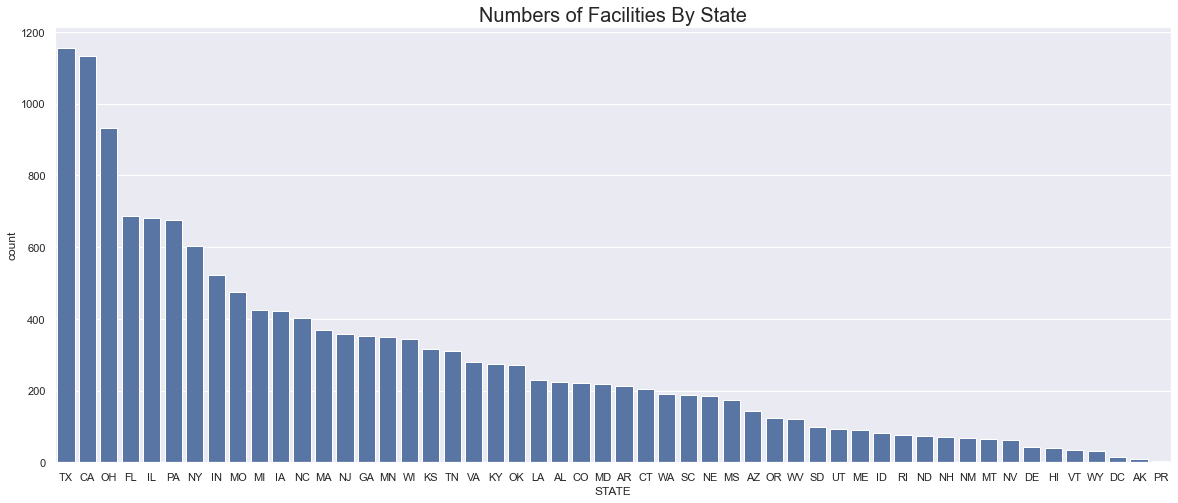

In [146]:
sns.set(rc={"figure.figsize":(20, 8)})
nursing_facilities_df = nursing_df.groupby('PROVNUM').first()
ax = sns.countplot(x="STATE", data=nursing_facilities_df, color='b',
                   order = nursing_facilities_df['STATE'].value_counts().index)
ax.set_title('Numbers of Facilities By State', fontsize=20);

### Texas has the most nursing homes, followed by California. Both states have more than 1000 nursing homes.
### The third is Ohio, has more than 900 nursing homes.

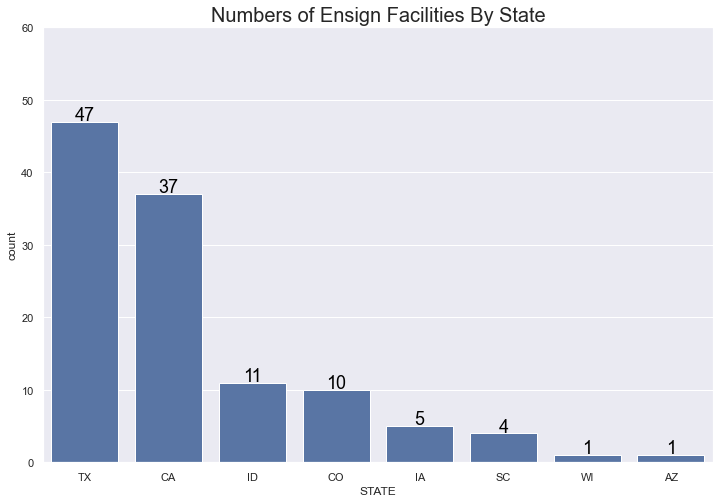

In [148]:
ensign_facility_df = ensign_nurse_df.groupby('PROVNUM').first()
sns.set(rc={"figure.figsize":(12, 8)})
ax = sns.countplot(x="STATE", data=ensign_facility_df, color='b',
                   order = ensign_facility_df['STATE'].value_counts().index)
ax.set_title('Numbers of Ensign Facilities By State', fontsize=20)
ax.set(ylim=(0, 60))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height() + 5.0), ha='center', va='top', color='black', size=18)

### A total of 116 Ensign nursing homes are included in the data. That's of 53% of all Ensign's providers.
### Ensign owns about 0.8% of the nursing homes in the US.
### The Ensign nursing home facilities are in eight different states: TX, CA, ID, CO, IA, SC, WI, and AZ
### Most of Ensign's nursing home facilities are in Texas (47), and California (37)

In [153]:
len(ensign_facility_df)/len(nursing_facilities_df) * 100

0.7879364216818366

In [158]:
len(ensign_prov_nums)

218

In [161]:
len(ensign_facility_df)

116

In [160]:
len(ensign_facility_df)/len(ensign_prov_nums)

0.5321100917431193

#### Columns with high zero values: 
       'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin',  
       'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin',  
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr',  
       'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide',  
       'Hrs_MedAide_emp', 'Hrs_MedAide_ctr'  

In [10]:
nurse_null_df = check_null_values(nursing_df)
nurse_null_df[nurse_null_df['percent_zero'] > 39.0].columns

Index(['columns', 'percent_null', 'percent_zero'], dtype='object')

In [57]:
all_nursing_df = add_features(nursing_df, q4_holidays, ensign_prov_nums)
all_nursing_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06
mean,2.919040e+02,2.191674e+01,2.699872e+02,1.321208e+01,2.786919e+02,5.490775e+00
std,1.800604e+02,2.226532e+01,1.689143e+02,3.627630e+01,1.729659e+02,1.415226e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.750000e+02,5.710000e+00,1.607500e+02,0.000000e+00,1.663000e+02,0.000000e+00
50%,2.562500e+02,1.650000e+01,2.364000e+02,0.000000e+00,2.450000e+02,0.000000e+00
75%,3.622075e+02,3.200000e+01,3.352500e+02,8.000000e+00,3.477275e+02,0.000000e+00
max,4.316830e+03,4.290000e+02,3.937330e+03,1.137730e+03,4.316830e+03,2.772500e+02


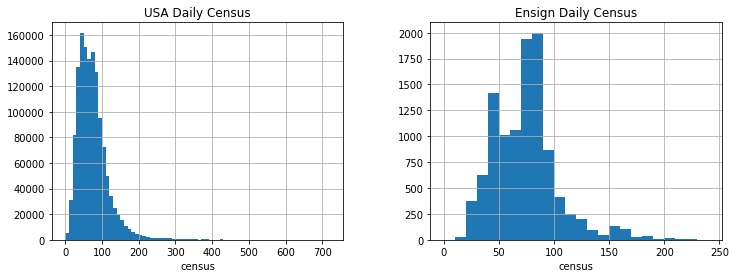

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
all_nursing_df.hist('MDScensus', bins=np.arange(0, all_nursing_df['MDScensus'].max() + 10, 10) , ax=axes[0])
axes[0].set_title('USA Daily Census')
axes[0].set_xlabel('census')
ensign_nurse_df.hist('MDScensus', bins=np.arange(0, ensign_nurse_df['MDScensus'].max() + 10, 10) , ax=axes[1])
axes[1].set_title('Ensign Daily Census')
axes[1].set_xlabel('census');

### Most facilities in the US have daily census less than 200.   
### All Ensign facilities have daily cencus < 250.   
### The variations could be related to the facility's size, but we don't have information about it.  

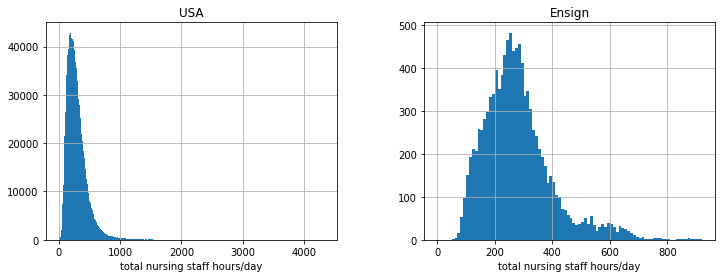

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
all_nursing_df.hist('total_hours', bins=np.arange(0, all_nursing_df['total_hours'].max() + 10, 10) , ax=axes[0])
axes[0].set_title('USA')
axes[0].set_xlabel('total nursing staff hours/day')
ensign_nurse_df.hist('total_hours', bins=np.arange(0, ensign_nurse_df['total_hours'].max() + 10, 10) , ax=axes[1])
axes[1].set_title('Ensign')
axes[1].set_xlabel('total nursing staff hours/day');

### Most US facilities in the US have total nursing staff hours less than 1000 hours/day
### Most Ensing facilities have total nursing staff hours less than 800 hours/day
### Again, the variations could be due to facility size and census

In [84]:
# drop outliers
nurse_staff_df = all_nursing_df[all_nursing_df['MDScensus'] < 250]
nurse_staff_df = nurse_staff_df[nurse_staff_df['total_hours'] < 1000]
len(nurse_staff_df)

1336434

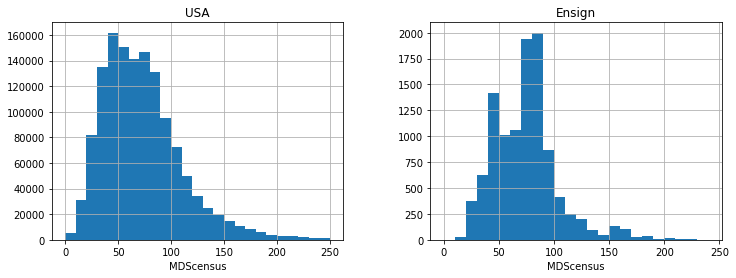

In [86]:
compare_data_distribution(nurse_staff_df, ensign_nurse_df, 'MDScensus')

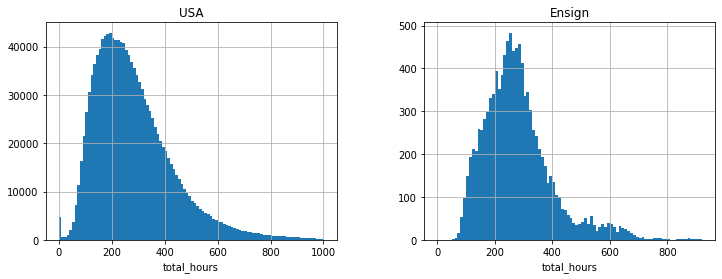

In [87]:
compare_data_distribution(nurse_staff_df, ensign_nurse_df, 'total_hours')

### After dropping the outliers, we see right-skewed normal distribution of MDS census for both the entire nation and Ensign facilities.
### And right-skewed normal distribution of total nurse staffing hours for both the entire nation and Ensign facilities.

In [89]:
ensign_per_patient_df = staff_hours_per_person(ensign_nurse_df, hour_features)
ensign_per_patient_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000
mean,3.870868,0.329137,3.541738,0.042712,3.828169,0.164784
std,0.903241,0.259682,0.809740,0.139305,0.900649,0.292434
min,1.470000,0.000000,1.460000,0.000000,1.380000,0.000000
25%,3.270000,0.100000,2.980000,0.000000,3.240000,0.000000
50%,3.770000,0.330000,3.450000,0.000000,3.730000,0.000000
75%,4.300000,0.480000,3.940000,0.000000,4.270000,0.220000
max,10.080000,1.960000,8.810000,1.620000,10.080000,2.150000


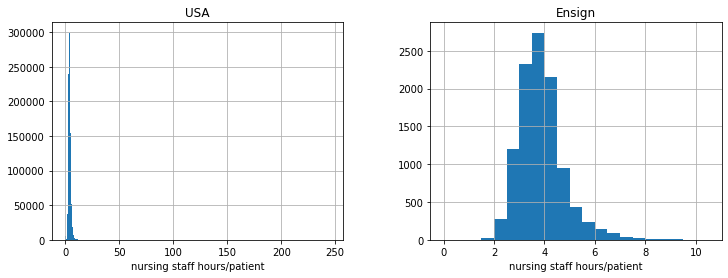

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
per_patient_nurse_df.hist('total_hours', bins=np.arange(0, per_patient_nurse_df['total_hours'].max() + 0.5, 0.5) , ax=axes[0])
axes[0].set_title('USA')
axes[0].set_xlabel('nursing staff hours/patient')
ensign_per_patient_df.hist('total_hours', bins=np.arange(0, ensign_per_patient_df['total_hours'].max() + 0.5, 0.5) , ax=axes[1])
axes[1].set_title('Ensign')
axes[1].set_xlabel('nursing staff hours/patient');

In [92]:
# remove outliers where hours per patient > 12
all_per_patient_df = per_patient_nurse_df[per_patient_nurse_df['total_hours'] <= 12]

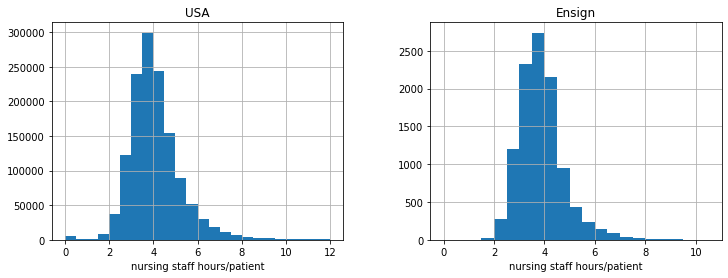

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
all_per_patient_df.hist('total_hours', bins=np.arange(0, all_per_patient_df['total_hours'].max() + 0.5, 0.5) , ax=axes[0])
axes[0].set_title('USA')
axes[0].set_xlabel('nursing staff hours/patient')
ensign_per_patient_df.hist('total_hours', bins=np.arange(0, ensign_per_patient_df['total_hours'].max() + 0.5, 0.5) , ax=axes[1])
axes[1].set_title('Ensign')
axes[1].set_xlabel('nursing staff hours/patient');

### After dropping the outliers, we can see that most facilities is the US have 2 - 6 nursing staff hours per patient per day, with the peak at aroud 3.8.
### The distribution is similar for the Ensign facilities - slightly right-skewed normal distribution
### Next, we further explore the percentiles of nursing staff hours per patient:

In [162]:
# Percentiles of nursing staff hours per patient
all_per_patient_df['total_hours'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    2.58
0.25    3.34
0.50    3.91
0.75    4.61
0.95    6.20
Name: total_hours, dtype: float64

In [165]:
iqr_all = all_per_patient_df['total_hours'].quantile(0.75) - all_per_patient_df['total_hours'].quantile(0.25)
iqr_all

1.2700000000000005

In [163]:
# Percentiles of nursing staff hours per patient
ensign_per_patient_df['total_hours'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    2.66
0.25    3.27
0.50    3.77
0.75    4.30
0.95    5.54
Name: total_hours, dtype: float64

In [166]:
iqr_ensign = ensign_per_patient_df['total_hours'].quantile(0.75) - ensign_per_patient_df['total_hours'].quantile(0.25)
iqr_ensign

1.0299999999999998

### The Ensign's nursing staff hours IQR is less than the nation's nurse staffing hours IQR, indicating less variability of nurse staffing hours per patient within the Ensign facilities.
### There are some days with very high and very low nursing staff hours per patient. Next, we will expolore more on those records within less than 5% percentile and more than 95% percentile.

In [132]:
# extract the records with > 95% nursing staff hours per patient
ensign_high_hour = ensign_per_patient_df[ensign_per_patient_df['total_hours'] > 6.20]
ensign_high_hour['PROVNUM'].nunique()

15

In [133]:
ensign_high_hour['PROVNUM'].value_counts().index

Int64Index([555871, 555258,  55632,  65404, 555326,  65417, 555545, 555739,
            555613, 135134, 555796, 135125,  55734,  55756, 135129],
           dtype='int64')

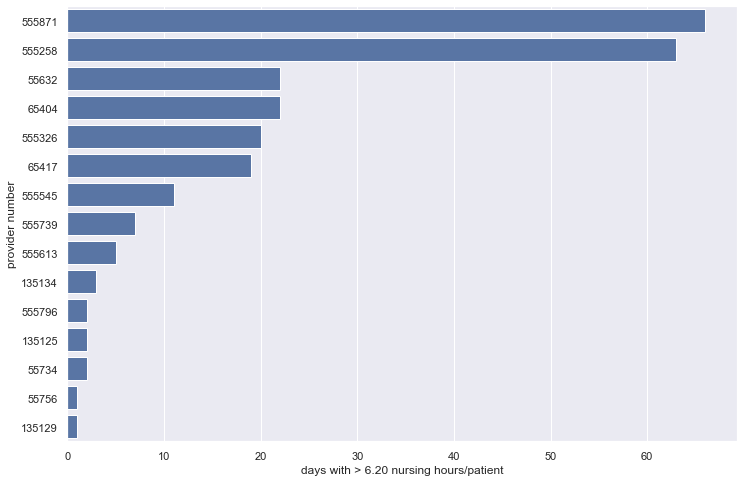

In [170]:
sns.set(rc={"figure.figsize":(12, 8)})
ax = sns.countplot(data=ensign_high_hour, y='PROVNUM', order=ensign_high_hour['PROVNUM'].value_counts().index, color='b');
ax.set(xlabel='days with > 6.20 nursing hours/patient', ylabel='provider number');

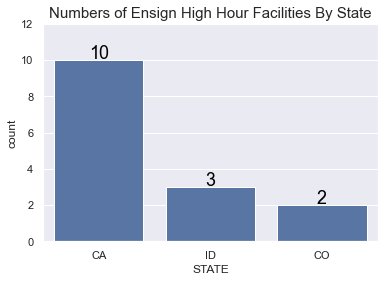

In [195]:
high_ensign_facility_df = ensign_high_hour.groupby('PROVNUM').first()
sns.set(rc={"figure.figsize":(6, 4)})
ax = sns.countplot(x="STATE", data=high_ensign_facility_df, color='b',
                   order = high_ensign_facility_df['STATE'].value_counts().index)
ax.set_title('Numbers of Ensign High Hour Facilities By State', fontsize=15)
ax.set(ylim=(0, 12))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height() + 2.0), ha='center', va='top', color='black', size=18)

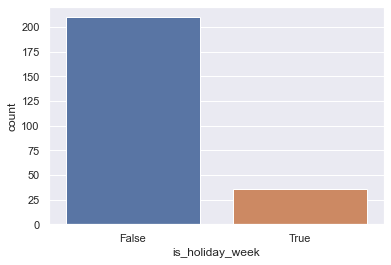

In [143]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_high_hour, x='is_holiday_week');

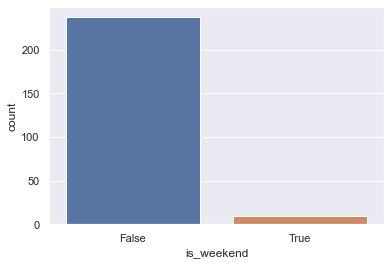

In [144]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_high_hour, x='is_weekend');

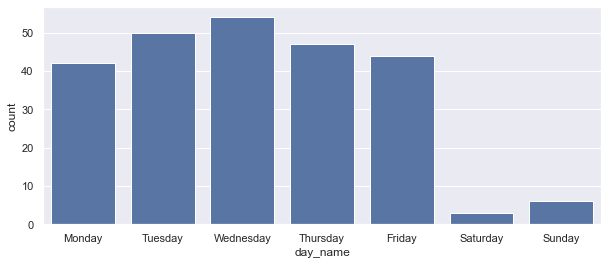

In [190]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.set(rc={"figure.figsize":(10, 4)})
sns.countplot(data=ensign_high_hour, x='day_name', order=order, color='b');

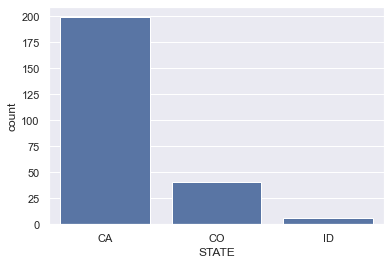

In [184]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_high_hour, x='STATE', order=ensign_high_hour['STATE'].value_counts().index, color='b');

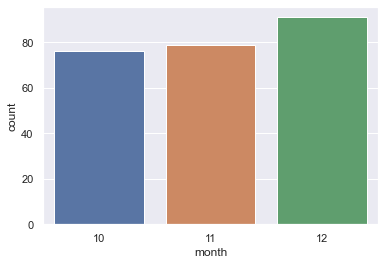

In [185]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_high_hour, x='month');

### There are 15 facilities with more than 6.20 nurse staffing hours/patient in this quarter.
### 10 of the 15 facilities are in California, 3 in Idaho, and 2 in Colorado.
### California also has the most days with high with high nurse staff hours per patient
### High nurse staffing hours occured mostly on weekdays, with only a few records on the weekends.
### High nurse staffing hours doesn't seem to be related to months or holidays.

In [136]:
ensign_low_hour = ensign_per_patient_df[ensign_per_patient_df['total_hours'] < 2.58]
ensign_low_hour['PROVNUM'].nunique()

40

<AxesSubplot:xlabel='count', ylabel='PROVNUM'>

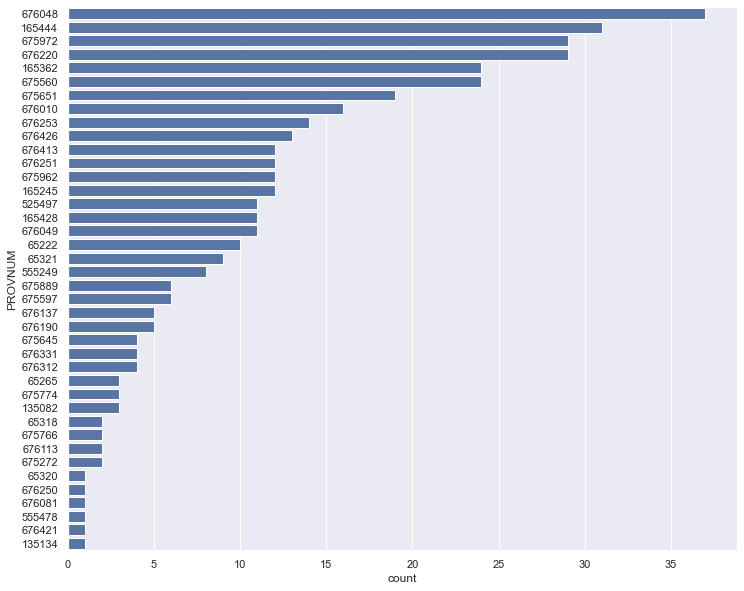

In [137]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.countplot(data=ensign_low_hour, y='PROVNUM', order=ensign_low_hour['PROVNUM'].value_counts().index, color='b')

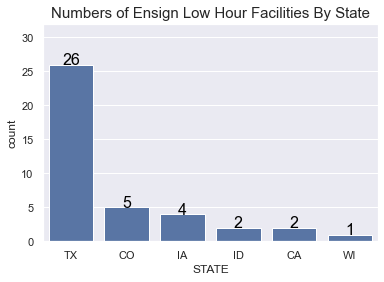

In [209]:
low_ensign_facility_df = ensign_low_hour.groupby('PROVNUM').first()
sns.set(rc={"figure.figsize":(6, 4)})
ax = sns.countplot(x="STATE", data=low_ensign_facility_df, color='b',
                   order = low_ensign_facility_df['STATE'].value_counts().index)
ax.set_title('Numbers of Ensign Low Hour Facilities By State', fontsize=15)
ax.set(ylim=(0, 32))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height() + 4.3), ha='center', va='top', color='black', size=16)

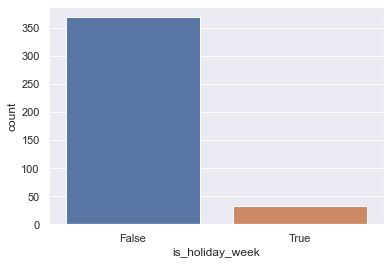

In [138]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_low_hour, x='is_holiday_week');

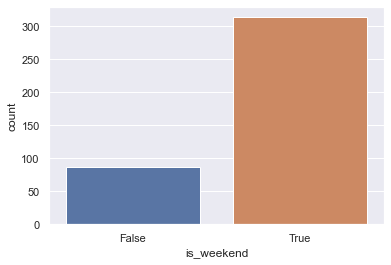

In [139]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_low_hour, x='is_weekend');

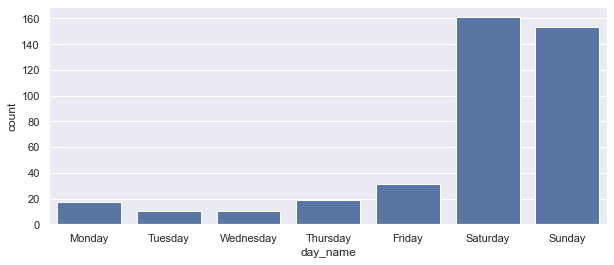

In [191]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.set(rc={"figure.figsize":(10, 4)})
sns.countplot(data=ensign_low_hour, x='day_name', order=order, color='b');

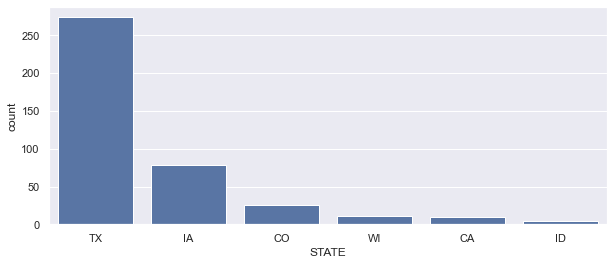

In [229]:
sns.set(rc={"figure.figsize":(10, 4)})
sns.countplot(data=ensign_low_hour, x='STATE', order=ensign_low_hour['STATE'].value_counts().index, color='b');

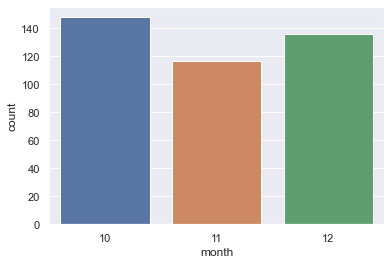

In [193]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=ensign_low_hour, x='month');

### There are 40 Ensign facilities with less than 2.58 nurse staffing hours per patient in this quarter.
### More than half of the low hour facilities are in Texas (26), followed by IA, CO, WI, CA, and ID.
### Texas has the most records with low nurse staffing hours per patient.
### Most of the low nurse staffing hours happened on the weekends.
### Low nurse staffing hours doesn't seem to be related to months or holidays.

### Next, I want to continue to compare the census, administration duty hours, non-administration duty hours, contractor hours, and non-contractor hours within the three dataframes:
##### 1. Total Ensign facility records
##### 2. Ensign high nurse staffing hours per patient records (> 6.20 hrs/pt)
##### 3. Ensign low nurse staffing hours per patient records (< 2.58 hrs/pt)

In [219]:
new_features = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr', 'MDScensus']
ensign_per_patient_df[new_features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,MDScensus
count,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000
mean,3.870868,0.329137,3.541738,0.042712,3.828169,73.641117
std,0.903241,0.259682,0.809740,0.139305,0.900649,29.409806
min,1.470000,0.000000,1.460000,0.000000,1.380000,13.000000
25%,3.270000,0.100000,2.980000,0.000000,3.240000,51.000000
50%,3.770000,0.330000,3.450000,0.000000,3.730000,74.000000
75%,4.300000,0.480000,3.940000,0.000000,4.270000,87.000000
max,10.080000,1.960000,8.810000,1.620000,10.080000,234.000000


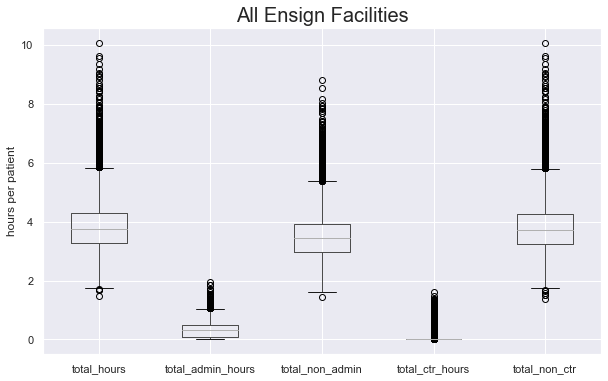

In [249]:
sns.set(rc={"figure.figsize":(10, 6)})
hour_columns = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr']
ax = ensign_per_patient_df.boxplot(column=hour_columns)
ax.set(ylabel='hours per patient')
ax.set_title('All Ensign Facilities', fontsize=20);

In [214]:
ensign_high_hour[new_features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,MDScensus
count,246.000000,246.000000,246.000000,246.000000,246.00000,246.000000
mean,6.984024,0.751057,6.233252,0.086992,6.89687,41.402439
std,0.727244,0.377067,0.653705,0.253993,0.79338,21.096973
min,6.210000,0.000000,4.570000,0.000000,4.91000,13.000000
25%,6.452500,0.542500,5.812500,0.000000,6.41250,22.000000
50%,6.785000,0.620000,6.165000,0.000000,6.73000,41.000000
75%,7.235000,1.055000,6.520000,0.000000,7.17750,45.000000
max,10.080000,1.960000,8.810000,1.470000,10.08000,105.000000


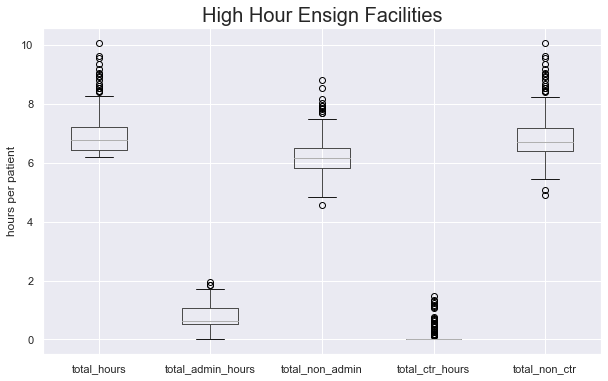

In [250]:
ax = ensign_high_hour.boxplot(column=hour_columns)
ax.set(ylabel='hours per patient')
ax.set_title('High Hour Ensign Facilities', fontsize=20);

In [215]:
ensign_low_hour[new_features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,MDScensus
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,2.341272,0.080474,2.261022,0.029651,2.311696,71.875312
std,0.195611,0.125758,0.208672,0.085542,0.212417,29.495498
min,1.470000,0.000000,1.460000,0.000000,1.380000,25.000000
25%,2.250000,0.000000,2.140000,0.000000,2.190000,49.000000
50%,2.390000,0.000000,2.300000,0.000000,2.360000,74.000000
75%,2.490000,0.120000,2.420000,0.000000,2.480000,84.000000
max,2.570000,0.630000,2.570000,0.570000,2.570000,234.000000


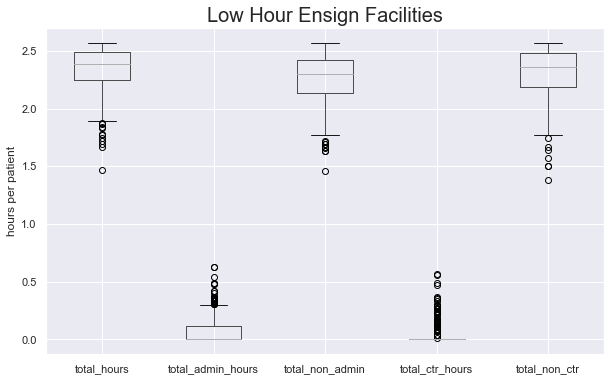

In [251]:
ax = ensign_low_hour.boxplot(column=hour_columns)
ax.set(ylabel='hours per patient')
ax.set_title('Low Hour Ensign Facilities', fontsize=20);

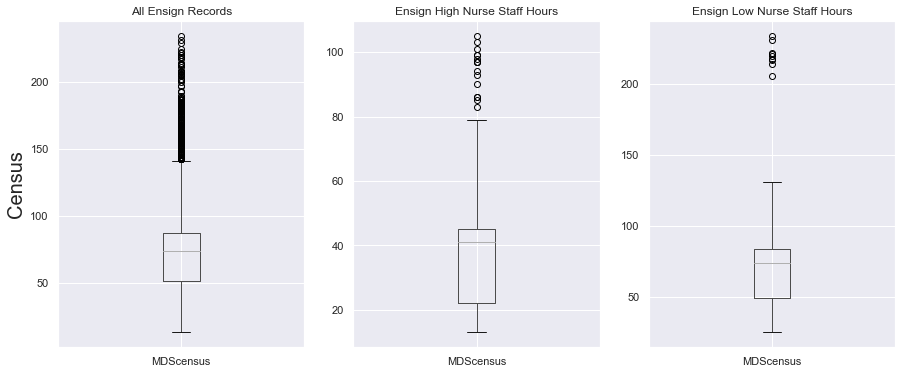

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
ensign_per_patient_df.boxplot(column='MDScensus', ax=axes[0])
ensign_high_hour.boxplot(column='MDScensus', ax=axes[1])
ensign_low_hour.boxplot(column='MDScensus', ax=axes[2])
axes[0].set_title('All Ensign Records')
axes[1].set_title('Ensign High Nurse Staff Hours')
axes[2].set_title('Ensign Low Nurse Staff Hours')
axes[0].set_ylabel('Census',fontsize=20);

### For all three types of records, the non-administration nurse staffing hours are much higher than administration hours, and the non-contractor nurse staffing hours are much higher than contractor staffing hours.

### The Low nurse staffing hour records (median: 74, 25%: 49, 75%:84) have similar census to the overall Ensign census (median: 74, 25%: 51, 75%: 87), whereas the High nurse staffing hours records have much lower daily census (median: 41, 25%: 49, 75%:84)

## Conclusions:
1. From the 2020 4th quarter PBJ nurse staffing data, we see that overall Ensign nursing homes's MDS census and total nurse staffing hours are close to the nation's nursing homes.

2. Most of the Ensign facilities are in Texas and California, which is in proportion to the nationwide nursing home distributions.

3. Most facilties have nurse staffing hours per patient between 3.34 and 4.61 hours; Ensign has most of it's facilities between 3.27 and 4.30 hours per patient.

4. State is a contributing factor to very high and very low nurse staffing hours per patient for the Ensign facilities. California has the highest percentage of high nurse staffing hours/patient, and Texas has the lowest.

5. Most of Ensign's low nurse staffing hours records are on the weekends.

6. Records with high nurse staffing hours per patient show much lower census than all other records.


## Recommendations:
1. Facility 555871 and 555258 both have more than 60 days with nurse staffing hours per patient > 6.20 hours. It's worth more investigation on the cause, such as quality control of the facilities, location, marketing, etc.

2. Most low nurse staffing hours facilities are in Texas. Maybe we can put more effort on recruiting or retaining the nursing staff in those facilities.

3. For the future, can we encourage more nursing staff to work on the weekends? Most low nurse staffin hours/patient records are on the weekends.
